# 1.Problem statement

In [1]:
# Import Libraries 
import numpy as np
import pandas as pd

import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import zscore

from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score,accuracy_score

# 2. Data gathering 

In [2]:
df = pd.read_csv(r"C:\Vijay\Project\Compressive strength predection\data\Concrete_Data.csv")

In [3]:
df

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Compressive_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28,27.68
996,152.6,238.7,0.0,200.0,6.3,1001.8,683.9,28,26.86
997,310.0,142.8,0.0,167.9,10.0,914.3,804.0,28,45.30
998,304.8,0.0,99.6,196.0,9.8,959.4,705.2,28,30.12


# 3. EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1000 non-null   float64
 1   Blast_Furnace_Slag             1000 non-null   float64
 2   Fly_Ash                        1000 non-null   float64
 3   Water                          1000 non-null   float64
 4   Superplasticizer               1000 non-null   float64
 5   Coarse_Aggregate               1000 non-null   float64
 6   Fine_Aggregate                 1000 non-null   float64
 7   Age                            1000 non-null   int64  
 8   Concrete_Compressive_Strength  1000 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 70.4 KB


In [5]:
df.isna().sum()

Cement                           0
Blast_Furnace_Slag               0
Fly_Ash                          0
Water                            0
Superplasticizer                 0
Coarse_Aggregate                 0
Fine_Aggregate                   0
Age                              0
Concrete_Compressive_Strength    0
dtype: int64

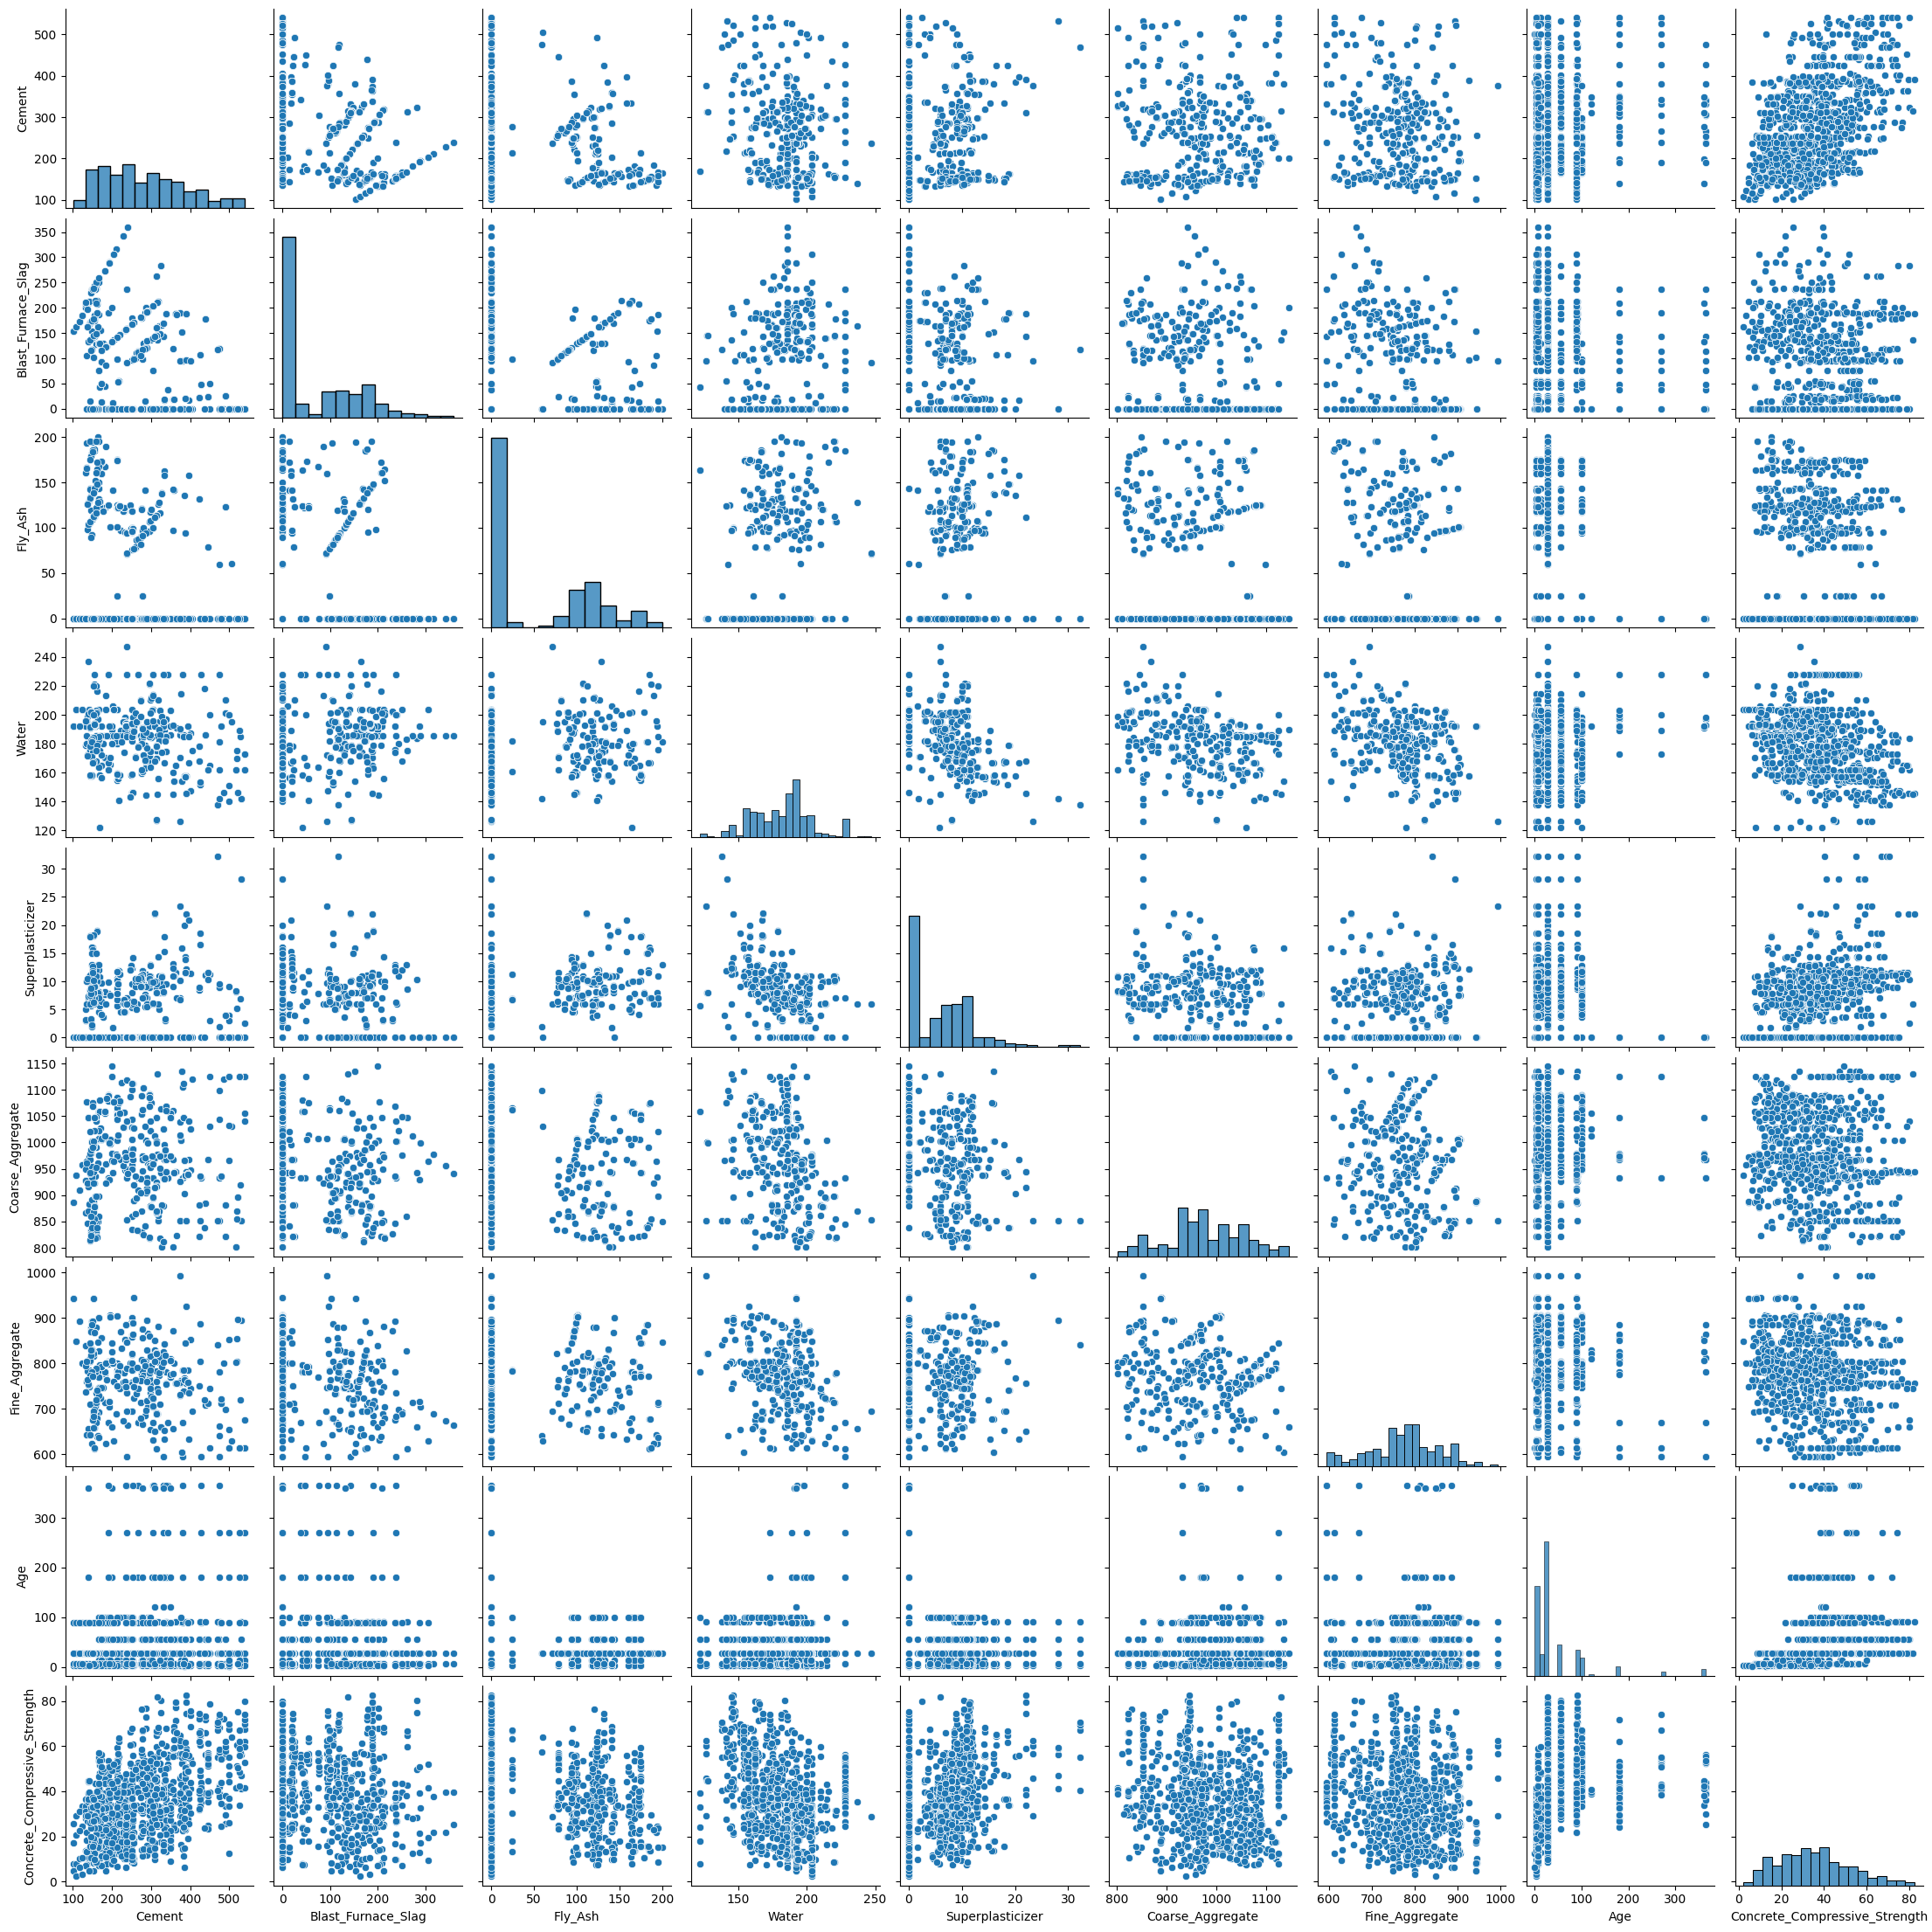

In [6]:
sns.pairplot(df)

In [7]:
df.corr()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Compressive_Strength
Cement,1.000000,-0.268367,-0.399852,-0.080754,0.100427,-0.117377,-0.229847,0.080175,0.500086
Blast_Furnace_Slag,-0.268367,1.000000,-0.324537,0.108738,0.038641,-0.287605,-0.280572,-0.041152,0.128026
Fly_Ash,-0.399852,-0.324537,1.000000,-0.272959,0.378577,0.013752,0.082990,-0.153180,-0.101424
Water,-0.080754,0.108738,-0.272959,1.000000,-0.668030,-0.171723,-0.450713,0.282923,-0.295044
Superplasticizer,0.100427,0.038641,0.378577,-0.668030,1.000000,-0.262132,0.226201,-0.190124,0.370697
Coarse_Aggregate,-0.117377,-0.287605,0.013752,-0.171723,-0.262132,1.000000,-0.184087,-0.012659,-0.159582
Fine_Aggregate,-0.229847,-0.280572,0.082990,-0.450713,0.226201,-0.184087,1.000000,-0.158490,-0.166763
Age,0.080175,-0.041152,-0.153180,0.282923,-0.190124,-0.012659,-0.158490,1.000000,0.333786
Concrete_Compressive_Strength,0.500086,0.128026,-0.101424,-0.295044,0.370697,-0.159582,-0.166763,0.333786,1.000000


<Axes: >

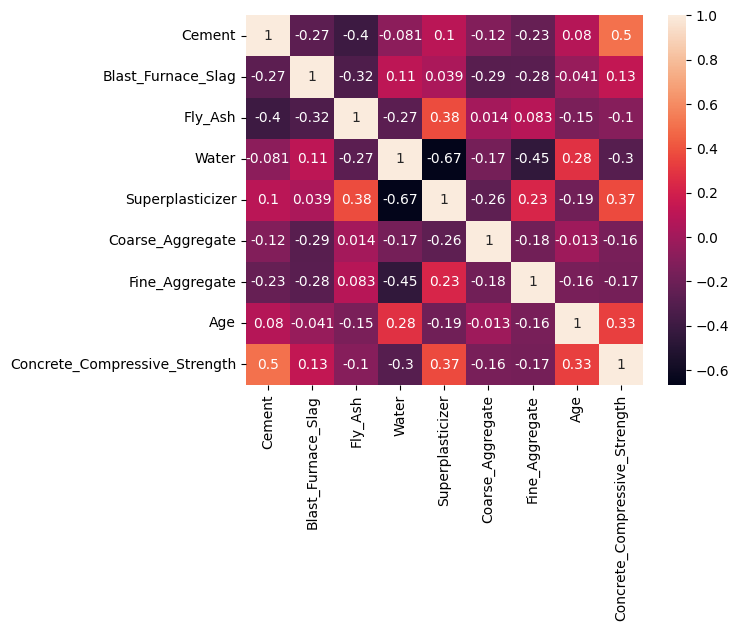

In [8]:
sns.heatmap(df.corr(), annot=True)

<Axes: >

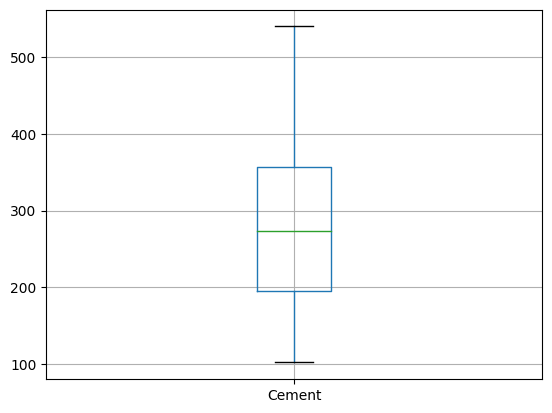

In [9]:
df[['Cement']].boxplot()

<Axes: >

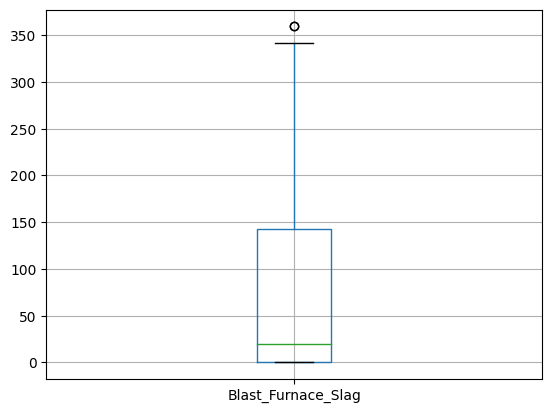

In [10]:
df[['Blast_Furnace_Slag']].boxplot()

In [11]:
def outlier(array): 
    z_score = zscore(array) 
    index_list = np.where(np.abs(z_score) > 3) 
    outliers = array[index_list] 
    return index_list,outliers[0]
outlier(df['Blast_Furnace_Slag'].to_numpy())


((array([553, 559, 571, 584], dtype=int64),), 359.4)

In [12]:
df.iloc[[553,559,571,584],1]

553    359.4
559    359.4
571    342.1
584    342.1
Name: Blast_Furnace_Slag, dtype: float64

<Axes: xlabel='Blast_Furnace_Slag', ylabel='Density'>

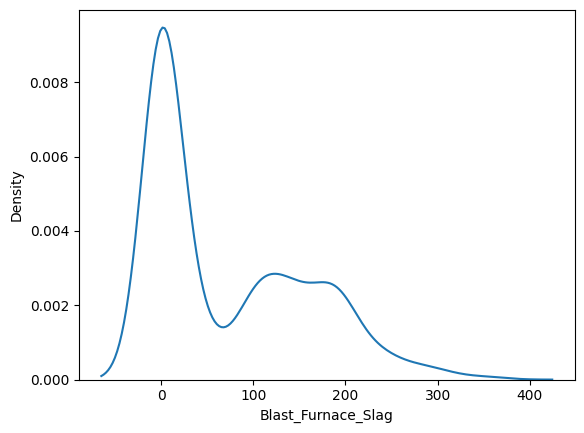

In [13]:
sns.kdeplot(df['Blast_Furnace_Slag'])

In [14]:
df['Blast_Furnace_Slag'].median()

20.0

In [15]:
df.iloc[[553,559,571,584],1]=df['Blast_Furnace_Slag'].median()

In [16]:
df.loc[[553,559,571,584]]

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Compressive_Strength
553,239.6,20.0,0.0,185.7,0.0,941.6,664.3,7,25.42
559,239.6,20.0,0.0,185.7,0.0,941.6,664.3,28,39.44
571,228.0,20.0,0.0,185.7,0.0,955.8,674.3,28,39.70
584,228.0,20.0,0.0,185.7,0.0,955.8,674.3,7,21.92


<Axes: >

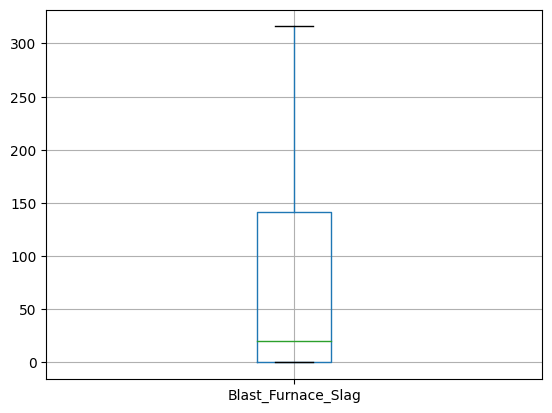

In [17]:
df[['Blast_Furnace_Slag']].boxplot()

<Axes: >

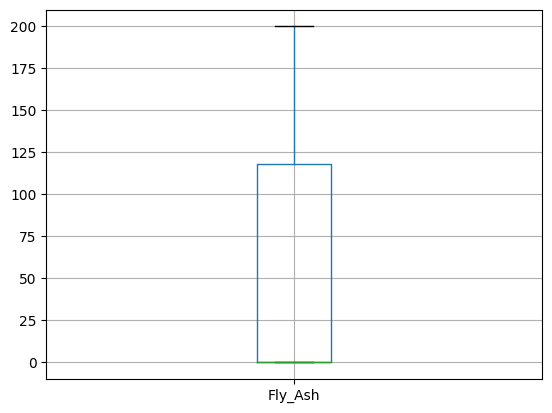

In [18]:
df[['Fly_Ash']].boxplot()

<Axes: >

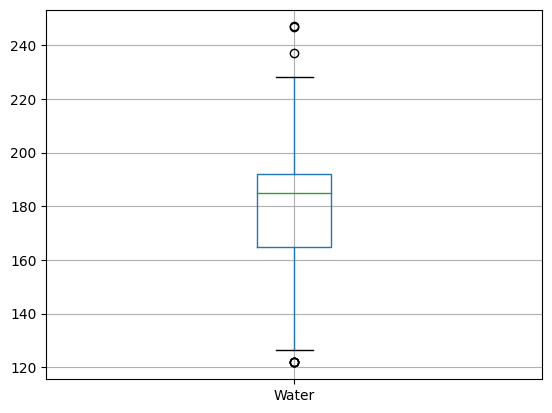

In [19]:
df[['Water']].boxplot()

In [20]:
outlier(df['Water'].to_numpy())

((array([873, 936], dtype=int64),), 247.0)

<Axes: >

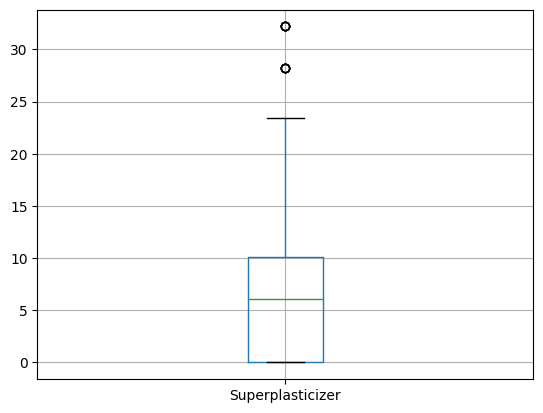

In [21]:
df[['Superplasticizer']].boxplot()

<Axes: >

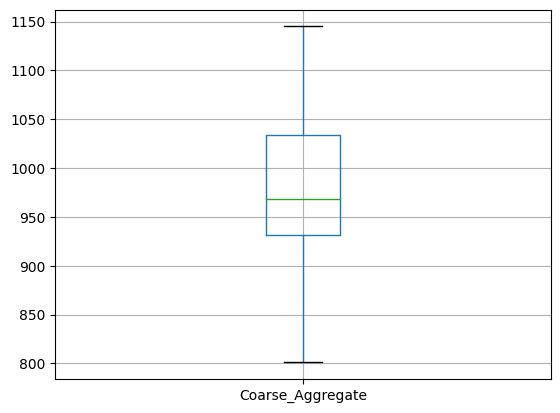

In [22]:
df[['Coarse_Aggregate']].boxplot()

<Axes: >

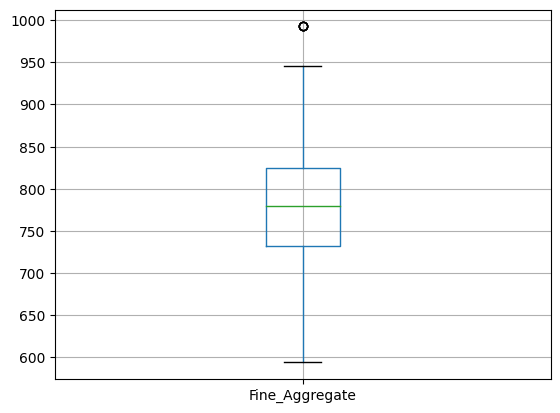

In [23]:
df[['Fine_Aggregate']].boxplot()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1000 non-null   float64
 1   Blast_Furnace_Slag             1000 non-null   float64
 2   Fly_Ash                        1000 non-null   float64
 3   Water                          1000 non-null   float64
 4   Superplasticizer               1000 non-null   float64
 5   Coarse_Aggregate               1000 non-null   float64
 6   Fine_Aggregate                 1000 non-null   float64
 7   Age                            1000 non-null   int64  
 8   Concrete_Compressive_Strength  1000 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 70.4 KB


In [25]:
# No Multicolinearity
vif_list = []
for i in range(df.shape[1]-1):
    vif = variance_inflation_factor(df.to_numpy(),i)
    print(f'{df.columns[i]} = {vif}')

Cement = 26.284623122171123
Blast_Furnace_Slag = 4.349479646687363
Fly_Ash = 4.5355253746019235
Water = 94.255116353211
Superplasticizer = 5.6008668155216075
Coarse_Aggregate = 88.691364119811
Fine_Aggregate = 72.93122488906465
Age = 2.4378776196040133


# 5. Model Training

In [26]:
x = df.drop('Concrete_Compressive_Strength', axis=1)
y = df['Concrete_Compressive_Strength'] 

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=.8, random_state=6)

In [28]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 8), (200, 8), (800,), (200,))

In [29]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [30]:
def model_eval(model,input_data,output):
    score = model.score(input_data,output)
    print(score)

In [31]:
model_eval(model,x_train,y_train)  

0.6056727808322939


In [32]:
model_eval(model,x_test,y_test) 

0.6374123555217277


### user function

In [33]:
df.columns

Index(['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age',
       'Concrete_Compressive_Strength'],
      dtype='object')

In [34]:
Cement = float(input('Cement : '))
Blast_Furnace_Slag = float(input('Blast_Furnace_Slag : '))
Fly_Ash = float(input('Fly_Ash : '))
Water = float(input('Water : '))
Superplasticizer = float(input('Superplasticizer : '))
Coarse_Aggregate = float(input('Coarse_Aggregate : '))
Fine_Aggregate = float(input('Fine_Aggregate : '))
Age = float(input('Age : '))
                      
data = np.array([Cement, Blast_Furnace_Slag, Fly_Ash, Water, Superplasticizer,
                 Coarse_Aggregate, Fine_Aggregate, Age], ndmin=2)

Concrete_Compressive_Strength = model.predict(data)[0]
print(Concrete_Compressive_Strength)


Cement : 300
Blast_Furnace_Slag : 20
Fly_Ash : 20
Water : 210
Superplasticizer : 55
Coarse_Aggregate : 1100
Fine_Aggregate : 1200
Age : 28
31.122244697348343


C:\Users\hp\anaconda3\envs\concrete_pred\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [40]:
import pickle

In [41]:
with open('model.pkl','wb') as file:
    pickle.dump(model,file)

In [42]:
# with open(r'C:\Vijay\Daily Notes\23_03_01_git\project\artifacts\model.pkl','rb') as file:
#     pickle.load(file)

In [43]:
def get_Compressive_Strength_Predction():
    """
    Compressive Strength Predction
    """

    Cement = 300  
    Blast_Furnace_Slag = 25 
    Fly_Ash = 25  
    Water = 200 
    Superplasticizer = 30  
    Coarse_Aggregate = 1000 
    Fine_Aggregate = 950
    Age = 28 


    user_data = np.zeros(len(df.columns)-1)
    user_data[0] = Cement
    user_data[1] = Blast_Furnace_Slag
    user_data[2] = Fly_Ash
    user_data[3] = Water
    user_data[4] = Superplasticizer
    user_data[5] = Coarse_Aggregate
    user_data[6] = Fine_Aggregate
    user_data[7] = Age
    

    return model.predict([user_data])[0]      

In [44]:
get_Compressive_Strength_Predction()

C:\Users\hp\anaconda3\envs\concrete_pred\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.504490960439025